In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px


In [ ]:
def load_qb_data():
    data = pd.read_csv('qb_data.csv', index_col=0)
    data = data[data['YDS'] > 10]
    data = data[data['ATT'] > 3]
    data = data.fillna(0)
    return data

df = load_qb_data()

In [52]:
def load_wr_data():
    data = pd.read_csv('wr_full.csv', index_col=0)
    data = data.dropna()
    return data

df1 = load_wr_data()

In [ ]:
import pandas as pd
import plotly.express as px

def plot_qb_leaders(df, feature, seasons, top_n=10, width=800, height=600):
    
    stats = {'Passing Yards':'YDS', 'Passing Attempts':'ATT', 'Yards per Attempt':'YPA','Completion Percentage':'CMPP', 'Passing Touchdowns':'TDs','Interceptions':'INTs', 'Quarterback Rating':'QBR', 'Sacks':'SCK','Rushing Attempts':'ATT(R)','Rushing Yards':'YDS(R)', 'Yards per Carry':'YPC', 'Rushing Touchdowns':'TDs(R)'}
    stats2 = dict(zip(stats.values(), stats.keys()))
    sum_list = ['GP','ATT(R)', 'YDS(R)', 'TDs(R)', 'YDS', 'ATT','TDs', 'INTs', 'SCK']

    df_filtered = df[df['Year'].isin(seasons)]

    if feature in sum_list:
        df_grouped = df_filtered.groupby('QB')[feature].sum().reset_index()
    else:
        df_grouped = df_filtered.groupby('QB')[feature].mean().reset_index()

    df_top_n = df_grouped.sort_values(by=feature, ascending=False).head(top_n)

    fig = px.bar(df_top_n, 
                 x='QB', 
                 y=feature, 
                 title=f"Top {top_n} Quarterbacks by {stats2[feature]} ({', '.join(map(str, seasons))})", 
                 labels={feature: feature, 'QB': 'Player Name'}, 
                 )
    
    fig.update_layout(width=width, height=height)
    return fig


In [94]:
fig = plot_qb_leaders(df, 'CMPP', [2023,2024], top_n=10)
fig.show()


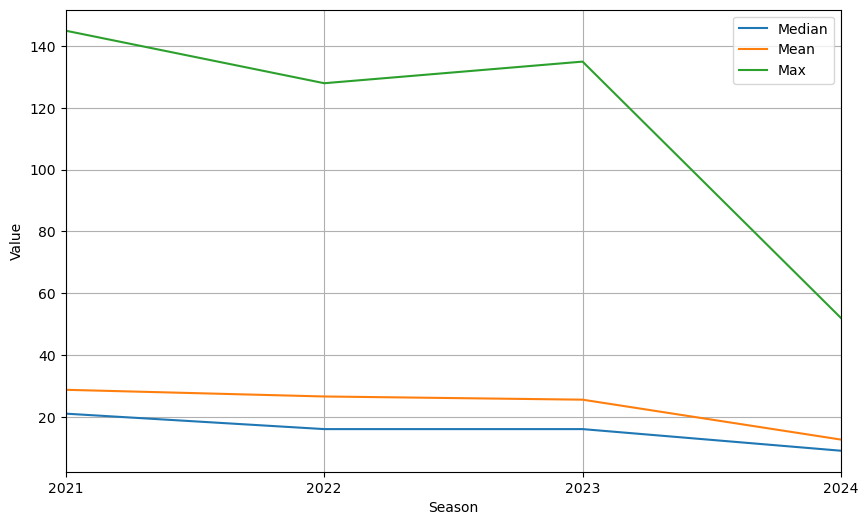

In [73]:
plt = plot_features_over_time(df1, ['Receptions'])
plt.show()

In [53]:
df1

,Reciever,Team,Games,Year,Receptions,REC_YDS,REC_TDS,REC_YAC,Targets
0,Brock Bowers,Las Vegas Raiders,8.0,2024.0,52,535,1,280,65
1,Garrett Wilson,New York Jets,8.0,2024.0,51,573,3,227,84
2,Chris Godwin,Tampa Bay Buccaneers,7.0,2024.0,50,576,5,350,62
3,Ja'Marr Chase,Cincinnati Bengals,8.0,2024.0,48,674,7,302,59
4,Drake London,Atlanta Falcons,8.0,2024.0,48,525,5,143,68
...,...,...,...,...,...,...,...,...,...
1950,Kyler Murray,Arizona Cardinals,14.0,2021.0,0,7,0,7,0
1956,Stephen Sullivan,Carolina Panthers,3.0,2021.0,0,0,0,0,1
1958,Mike White,New York Jets,4.0,2021.0,0,0,0,0,0
1959,Trent Williams,San Francisco 49ers,15.0,2021.0,0,0,0,0,1


In [69]:
import plotly.graph_objects as go


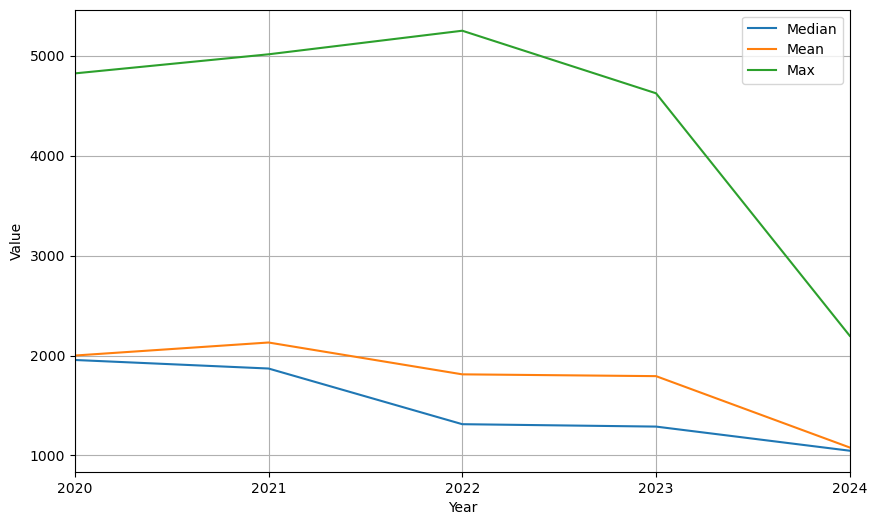

In [65]:
stat = 'Passing Yards'
stats = {'Passing Yards':'YDS', 'Passing Attempts':'ATT', 'Yards per Attempt':'YPA','Completion Percentage':'CMPP', 'Passing Touchdowns':'TDs','Interceptions':'INTs', 'Quarterback Rating':'QBR', 'Sacks':'SCK','Rushing Attempts':'ATT(R)','Rushing Yards':'YDS(R)', 'Yards per Carry':'YPC', 'Rushing Touchdowns':'TDs(R)'}
stat2 = stats[stat]

plot_features_over_time(df, [stat2])

In [ ]:
df

,QB,Team,GP,Year,ATT(R),YDS(R),YPC,TDs(R),YDS,ATT,YPA,CMP,TDs,INTs,QBR,SCK,CMPP
0,Geno Smith,Seattle Seahawks,8,2024,30,177,5.9,1,2197,308,7.1,212,8,7,88.4,21,0.688312
1,Baker Mayfield,Tampa Bay Buccaneers,8,2024,29,169,5.8,2,2189,284,7.7,202,21,9,104.9,20,0.711268
2,Kirk Cousins,Atlanta Falcons,8,2024,14,8,0.6,0,2106,271,7.8,185,14,7,97.8,15,0.682657
3,Brock Purdy,San Francisco 49ers,8,2024,42,210,5,3,2101,242,8.7,156,10,7,93.7,15,0.644628
4,Lamar Jackson,Baltimore Ravens,8,2024,81,501,6.2,2,2099,236,8.9,158,17,2,115.4,12,0.669492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,Case Keenum,Cleveland Browns,2,2020,0,0,0,0,46,10,4.6,5,0,0,62.9,0,0.500000
393,Geno Smith,Seattle Seahawks,1,2020,2,-2,-1,0,33,5,6.6,4,0,0,94.2,1,0.800000
395,Nathan Peterman,Las Vegas Raiders,1,2020,1,9,9,0,25,5,5.0,3,0,0,72.9,2,0.600000
396,Jacoby Brissett,Indianapolis Colts,11,2020,17,19,1.1,3,17,8,2.1,2,0,0,39.6,2,0.250000
